# COVID-19 Mortality Prediction with Support Vector Regression Model

### Dependencies importing

In [1]:
# Auto reload imported module every time a jupyter cell is executed
%load_ext autoreload
%autoreload 2
### TBE -> To Be Engineering...
# covid_ts_pred package
from covid_ts_pred.c_eng.engineering import *

project env_path /Users/tekyteka/code/Teky-Teka/covid_ts_pred/.env
project env_path /Users/tekyteka/code/Teky-Teka/covid_ts_pred/covid_ts_pred/.env


In [ ]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [41]:
 #sklearn preproc

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [ ]:
### TBE done!
country='United Kingdom'

In [42]:
### TBE done!
data_index = pd.read_csv(get_csv_out_path(f'index_{country}.csv'))

In [43]:
data_index.head()

,date,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,gov_response,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,2020-01-30,0.005077,0.005028,0.0,4.0,4.0,1.0,1.0,0.010315,0.0,0.0,0.0,0.0
1,2020-01-31,0.011937,0.006281,0.0,6.0,2.0,1.0,0.0,0.023307,0.0,0.0,0.0,0.0
2,2020-02-01,0.011937,0.006281,0.0,6.0,0.0,1.0,0.0,0.023307,0.0,0.0,0.0,0.0
3,2020-02-02,0.014224,0.010048,0.0,10.0,4.0,2.0,1.0,0.028867,0.0,0.0,0.0,0.0
4,2020-02-03,0.014224,0.010048,0.0,88.0,78.0,2.0,0.0,0.028867,0.0,0.0,0.0,0.0


In [44]:
data_index=data_index.set_index('date')

In [45]:
data_index['day-1']=data_index['total_deaths'].shift(periods=1)
data_index['day-2']=data_index['total_deaths'].shift(periods=2)
data_index['day-3']=data_index['total_deaths'].shift(periods=3)
data_index['day-4']=data_index['total_deaths'].shift(periods=4)
data_index['day-5']=data_index['total_deaths'].shift(periods=5)
data_index['day-6']=data_index['total_deaths'].shift(periods=6)
data_index['day-7']=data_index['total_deaths'].shift(periods=7)
data_index['day-8']=data_index['total_deaths'].shift(periods=8)
data_index['day-9']=data_index['total_deaths'].shift(periods=9)
data_index['day-10']=data_index['total_deaths'].shift(periods=10)
data_index = data_index.iloc[10: , :]
data_index.head()

,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,gov_response,total_vaccinations,people_vaccinated,...,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
date,,,,,,,,,,,,,,,,,,,,,
2020-02-09,0.014224,0.010048,0.0,114.0,5.0,2.0,0.0,0.028867,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0
2020-02-10,0.014224,0.010048,0.0,118.0,4.0,2.0,0.0,0.028867,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0
2020-02-11,0.014224,0.010048,0.0,135.0,17.0,2.0,0.0,0.028867,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
2020-02-12,0.014224,0.010048,0.0,140.0,5.0,2.0,0.0,0.028867,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2020-02-13,0.014224,0.010048,0.0,145.0,5.0,2.0,0.0,0.028867,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [46]:
data_index=data_index.fillna(0)

In [47]:
data_index.head()

,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,gov_response,total_vaccinations,people_vaccinated,...,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
date,,,,,,,,,,,,,,,,,,,,,
2020-02-09,0.014224,0.010048,0.0,114.0,5.0,2.0,0.0,0.028867,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0
2020-02-10,0.014224,0.010048,0.0,118.0,4.0,2.0,0.0,0.028867,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0
2020-02-11,0.014224,0.010048,0.0,135.0,17.0,2.0,0.0,0.028867,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
2020-02-12,0.014224,0.010048,0.0,140.0,5.0,2.0,0.0,0.028867,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2020-02-13,0.014224,0.010048,0.0,145.0,5.0,2.0,0.0,0.028867,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


Text(0.5, 0, 'Date')

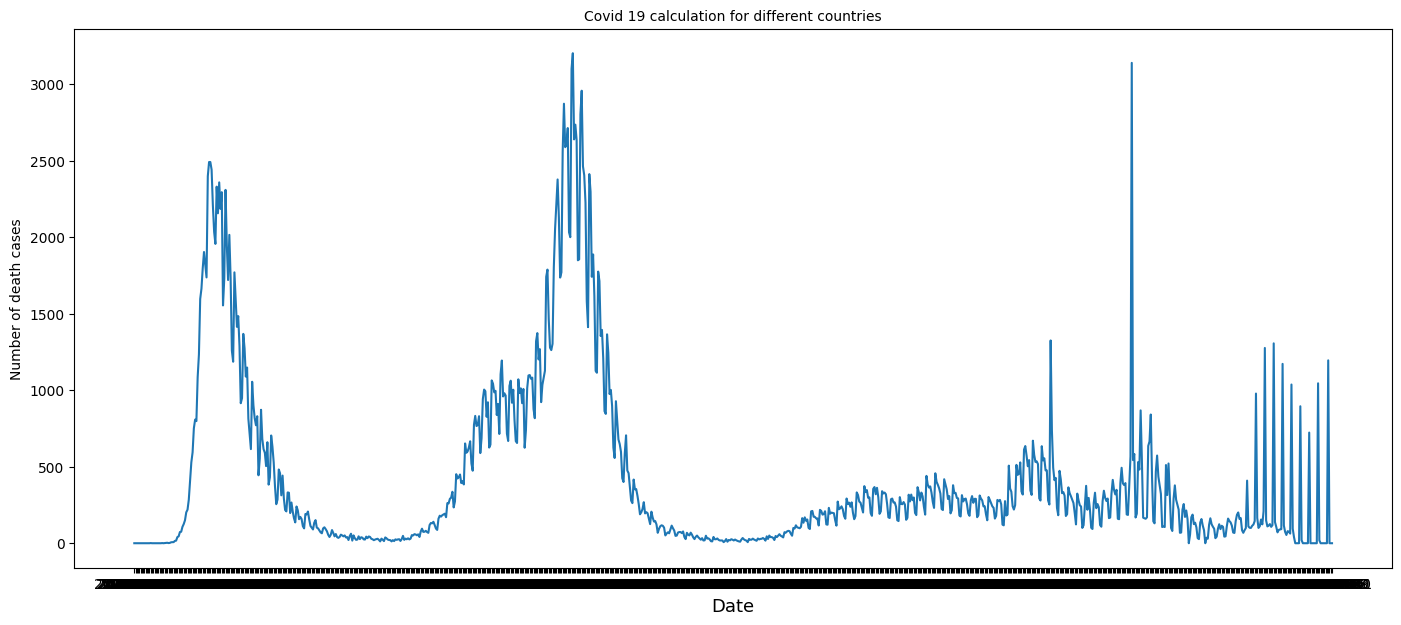

In [48]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(data_index.index,data_index['new_deaths']);
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)

Text(0.5, 0, 'Date')

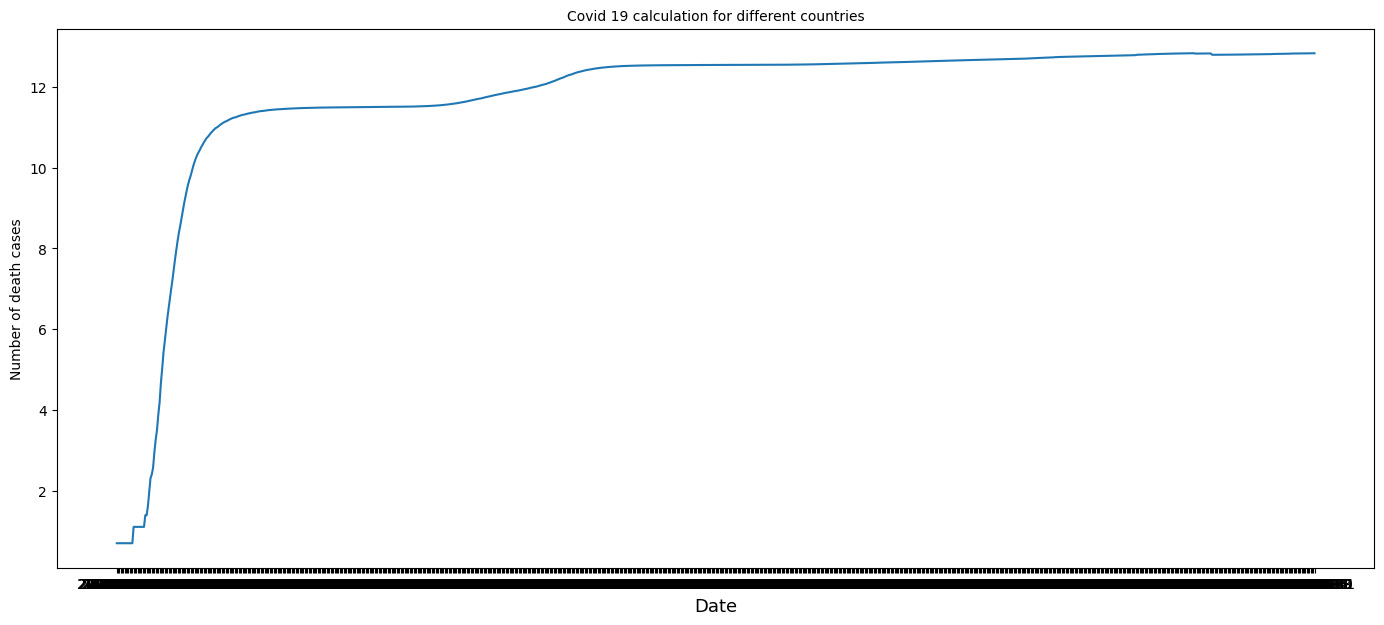

In [49]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(data_index.index[:925],np.log(data_index['total_deaths'][:925]));
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)

<AxesSubplot:xlabel='new_deaths', ylabel='Count'>

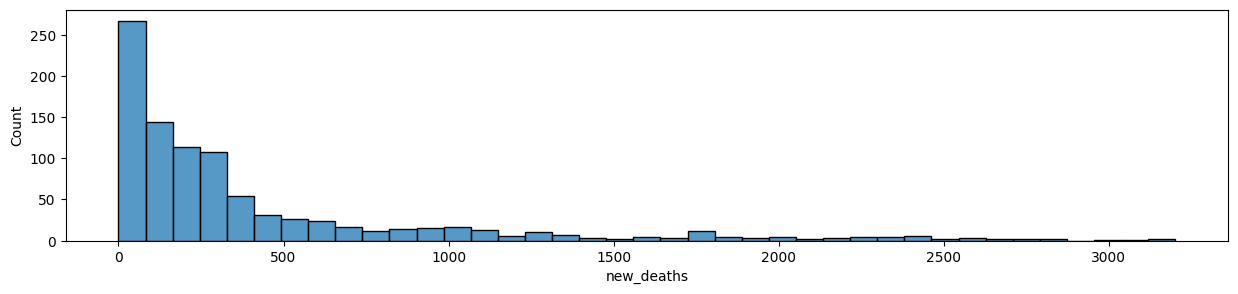

In [50]:

plt.figure(figsize=(15,3))
sns.histplot(data_index['new_deaths'])

# splitting of data into x and y

In [51]:
X=data_index.drop(columns=['total_deaths','new_deaths','new_cases'])
y=data_index['total_deaths']

In [52]:
X

,containment_and_health,stringency,economics_sup,total_cases,gov_response,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
date,,,,,,,,,,,,,,,,,,,
2020-02-09,0.014224,0.010048,0.0,114.0,0.028867,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0
2020-02-10,0.014224,0.010048,0.0,118.0,0.028867,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0
2020-02-11,0.014224,0.010048,0.0,135.0,0.028867,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
2020-02-12,0.014224,0.010048,0.0,140.0,0.028867,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2020-02-13,0.014224,0.010048,0.0,145.0,0.028867,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-07,0.000000,0.000000,0.0,83990958.0,0.041138,0.0,0.0,0.0,0.0,377715.0,377715.0,377715.0,377715.0,377715.0,377715.0,377696.0,376651.0,376651.0,376651.0
2022-09-08,0.000000,0.000000,0.0,27092511.0,0.041138,0.0,0.0,0.0,0.0,377715.0,377715.0,377715.0,377715.0,377715.0,377715.0,377715.0,377696.0,376651.0,376651.0
2022-09-09,0.000000,0.000000,0.0,27092511.0,0.041138,0.0,0.0,0.0,0.0,378910.0,377715.0,377715.0,377715.0,377715.0,377715.0,377715.0,377715.0,377696.0,376651.0


## scaling data

In [53]:
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

# splitting data into train and test set

In [54]:
n = len(X)
X_train = X[0:int(n-15)]
X_test=X[int(n-15):]
y_train=y[0:int(n-15)]
y_test=y[int(n-15):]

# Model

In [58]:
model =SVR(C=5, coef0=10, degree=8, epsilon=0.05, gamma='auto', kernel='poly')

In [57]:
param={'kernel' : ('poly', 'rbf'),'C' : [5,6],'degree' : [3,8],'coef0' : [0.01,0.5,10]}
grid_search = GridSearchCV(model, param_grid = param, 
                      cv = 2, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)
grid_search.best_estimator_

Fitting 2 folds for each of 24 candidates, totalling 48 fits


SVR(C=5, coef0=10, degree=8, epsilon=0.05, gamma='auto', kernel='poly')

## fitting the model for train and test set

In [59]:
model.fit(X_train,y_train)

SVR(C=5, coef0=10, degree=8, epsilon=0.05, gamma='auto', kernel='poly')

## prediction

In [60]:
y_pred=model.predict(X_test)

## evaluating model performance

In [61]:
score=mean_absolute_percentage_error(y_test, y_pred)
score

0.06679919694624835

[CV] END .............C=5, coef0=0.01, degree=3, kernel=poly; total time=   0.0s
[CV] END .............C=5, coef0=0.01, degree=8, kernel=poly; total time=   0.0s
[CV] END ..............C=5, coef0=0.01, degree=8, kernel=rbf; total time=   0.0s
[CV] END ..............C=5, coef0=0.5, degree=3, kernel=poly; total time=   0.0s
[CV] END ...............C=5, coef0=0.5, degree=3, kernel=rbf; total time=   0.1s
[CV] END ...............C=5, coef0=10, degree=3, kernel=poly; total time=   0.0s
[CV] END ................C=5, coef0=10, degree=3, kernel=rbf; total time=   0.0s
[CV] END ................C=5, coef0=10, degree=8, kernel=rbf; total time=   0.0s
[CV] END .............C=6, coef0=0.01, degree=3, kernel=poly; total time=   0.0s
[CV] END ..............C=6, coef0=0.01, degree=3, kernel=rbf; total time=   0.0s
[CV] END .............C=6, coef0=0.01, degree=8, kernel=poly; total time=   0.0s
[CV] END ..............C=6, coef0=0.01, degree=8, kernel=rbf; total time=   0.0s
[CV] END ..............C=6, 

[CV] END ..............C=5, coef0=0.01, degree=3, kernel=rbf; total time=   0.1s
[CV] END ...............C=5, coef0=0.5, degree=8, kernel=rbf; total time=   0.0s
[CV] END ...............C=5, coef0=10, degree=8, kernel=poly; total time=   2.1s
[CV] END .............C=5, coef0=0.01, degree=3, kernel=poly; total time=   0.0s
[CV] END .............C=5, coef0=0.01, degree=8, kernel=poly; total time=   0.0s
[CV] END ...............C=5, coef0=0.5, degree=3, kernel=rbf; total time=   0.0s
[CV] END ...............C=5, coef0=0.5, degree=3, kernel=rbf; total time=   0.1s
[CV] END ...............C=5, coef0=10, degree=8, kernel=poly; total time=   2.3s
[CV] END ...............C=5, coef0=10, degree=8, kernel=poly; total time=   6.2s
[CV] END ..............C=5, coef0=0.01, degree=3, kernel=rbf; total time=   0.1s
[CV] END ..............C=5, coef0=0.01, degree=8, kernel=rbf; total time=   0.1s
[CV] END ..............C=5, coef0=0.5, degree=8, kernel=poly; total time=   0.0s
[CV] END ..............C=5, 

In [22]:
y_pred.shape

(191,)

Text(0.5, 0, 'Date')

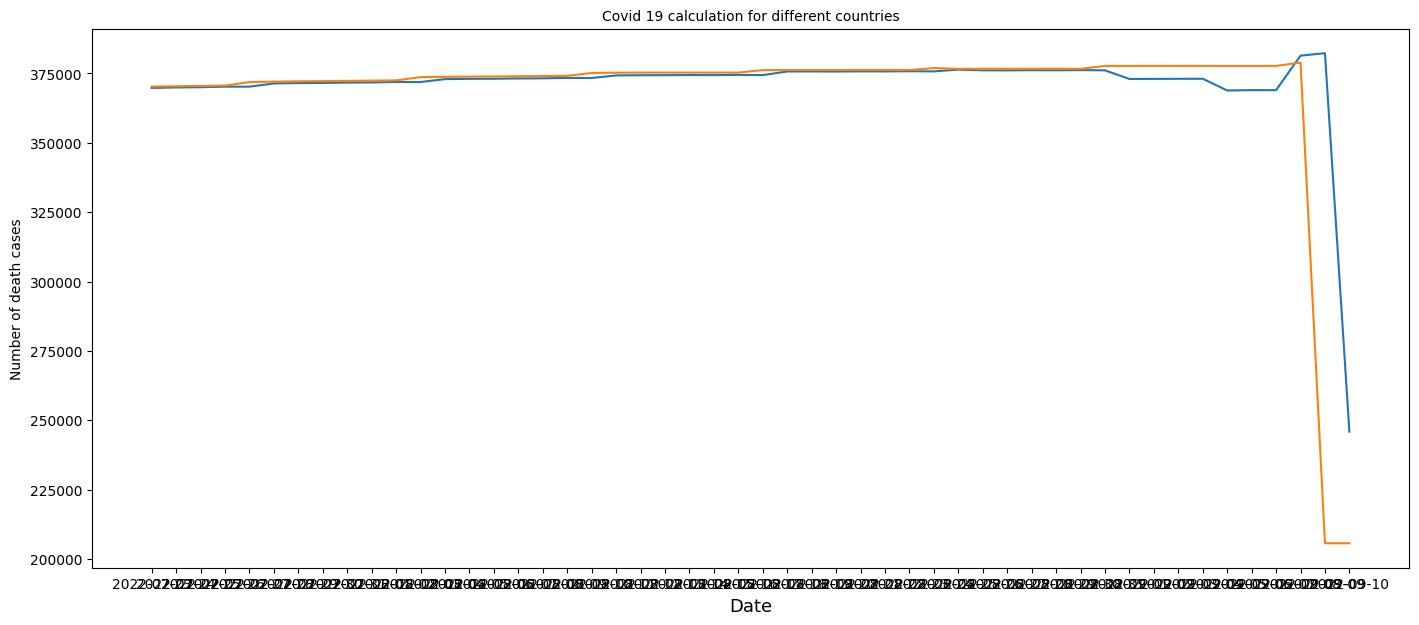

In [50]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(y_test.index[:175],y_pred[:175]);
plt.plot(y_test.index[:175],y_test[:175]);
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)